# Mobile Price Classfication 

## Importing Dependencies 

In [2]:
# Data Manipulation and Data Visualization
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Model Evaluator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


# Machine Learning models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Ignore warnings
import warnings 
warnings.filterwarnings("ignore")

## Exploratory Data Analysis 

### Loading the data 

In [7]:
mobile_train = pd.read_csv("../Data/train.csv") 
mobile_test = pd.read_csv("../Data/test.csv")

mobile_train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [8]:
mobile_test.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,...,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,...,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,...,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,...,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,...,20,52,1009,651,6,0,5,1,0,1


### Inspecting the data 

In [9]:
mobile_train.shape

(2000, 21)

In [10]:
# Checking Data types of the data
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
# Checking Unique values
mobile_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [12]:
mobile_train.price_range.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [13]:
mobile_train["price_range"].value_counts(normalize=True)

0    0.25
1    0.25
2    0.25
3    0.25
Name: price_range, dtype: float64

In [14]:
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Checking Relationship between the Variables

In [36]:
corr = mobile_test.corr()
corr

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,1.000000,-0.021511,0.000464,0.035917,-0.002721,0.016934,0.030921,-0.014023,-0.002794,-0.007541,...,0.001969,-0.025056,-0.012138,-0.043442,-0.011972,0.002918,0.030807,4.957099e-02,3.976791e-02,-0.036643
battery_power,-0.021511,1.000000,-0.046610,-0.039075,-0.061171,-0.007846,-0.042520,0.003751,-0.009065,-0.047065,...,0.012847,0.048647,0.053365,-0.032366,-0.055665,-0.023905,0.015546,3.151417e-02,-1.013784e-02,-0.000414
blue,0.000464,-0.046610,1.000000,0.034754,-0.011100,-0.056063,-0.001169,-0.012416,0.018319,0.023513,...,-0.025247,-0.058810,-0.032054,0.057570,0.012780,0.004223,-0.031995,1.352986e-02,-6.003074e-02,0.025568
clock_speed,0.035917,-0.039075,0.034754,1.000000,-0.012423,0.010127,-0.024665,-0.030487,0.016995,-0.014107,...,0.047469,0.017277,0.070585,-0.000650,-0.039503,-0.027138,-0.078797,-2.140644e-02,6.189276e-02,-0.048593
dual_sim,-0.002721,-0.061171,-0.011100,-0.012423,1.000000,0.057606,0.024907,-0.012158,0.021760,-0.001734,...,0.073936,0.006842,0.015610,0.048171,0.006295,-0.002064,0.004390,6.895838e-04,3.401967e-02,0.031545
fc,0.016934,-0.007846,-0.056063,0.010127,0.057606,1.000000,0.032832,-0.006565,0.020859,0.018353,...,0.659338,-0.017982,0.030550,-0.051997,0.045158,0.006115,-0.051458,-1.112104e-02,1.546706e-02,-0.060373
four_g,0.030921,-0.042520,-0.001169,-0.024665,0.024907,0.032832,1.000000,-0.037488,0.014806,-0.000509,...,0.037669,0.033655,0.036545,0.030821,-0.015087,-0.000893,0.013692,5.535283e-01,-1.000338e-02,-0.035652
int_memory,-0.014023,0.003751,-0.012416,-0.030487,-0.012158,-0.006565,-0.037488,1.000000,-0.004386,-0.010447,...,0.022682,-0.009564,-0.003877,-0.007107,-0.009249,0.024521,0.023759,-1.592239e-02,2.218589e-02,0.011860
m_dep,-0.002794,-0.009065,0.018319,0.016995,0.021760,0.020859,0.014806,-0.004386,1.000000,-0.041994,...,0.012663,0.062559,0.034861,0.018349,-0.026160,-0.023393,0.024124,-2.927827e-02,4.025363e-02,-0.039705
mobile_wt,-0.007541,-0.047065,0.023513,-0.014107,-0.001734,0.018353,-0.000509,-0.010447,-0.041994,1.000000,...,0.027343,0.011157,-0.014577,0.028786,-0.022053,0.022148,-0.021704,6.261881e-03,4.452531e-02,0.069762


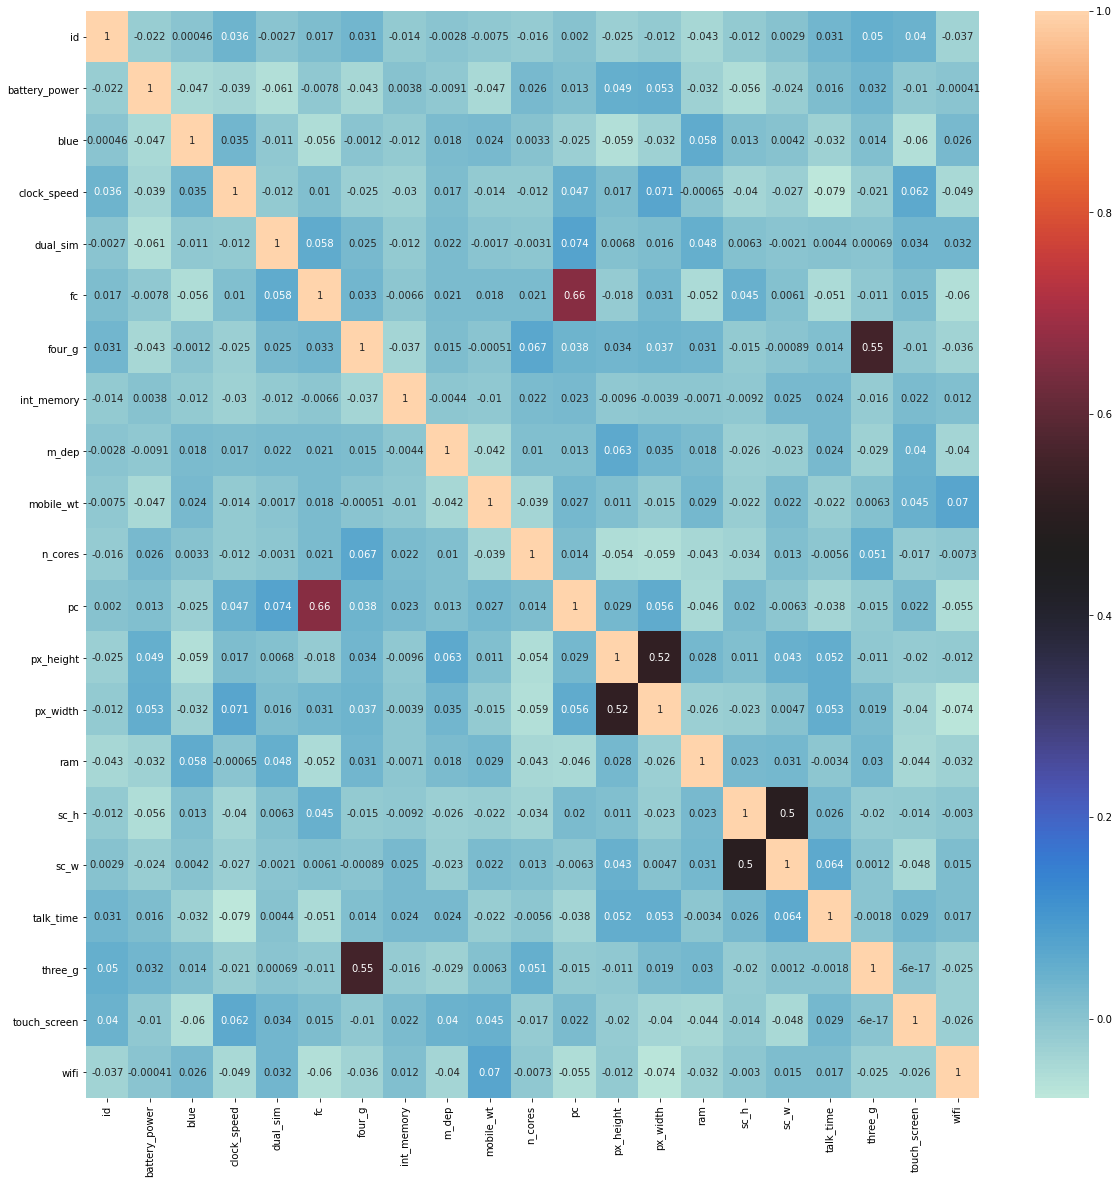

In [41]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True, ax=ax, cmap="icefire");

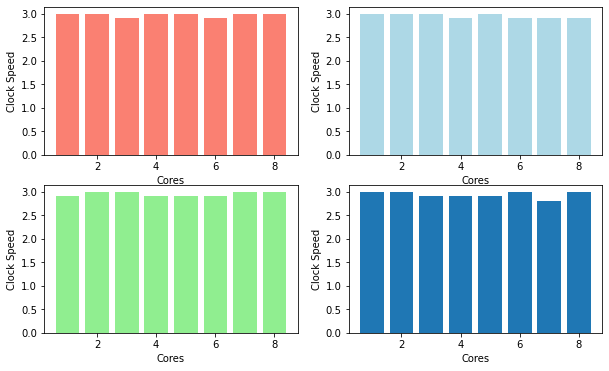

In [22]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(figsize=(10, 6), ncols = 2, nrows=2)

ax.bar(mobile_train["n_cores"][mobile_train.price_range == 0],
           mobile_train["clock_speed"][mobile_train.price_range == 0], color=["salmon"])

ax2.bar(mobile_train["n_cores"][mobile_train.price_range == 1],
           mobile_train["clock_speed"][mobile_train.price_range == 1],color=["lightblue"])

ax3.bar(mobile_train["n_cores"][mobile_train.price_range == 2],
           mobile_train["clock_speed"][mobile_train.price_range == 2],color=["lightgreen"])

ax4.bar(mobile_train["n_cores"][mobile_train.price_range == 3],
           mobile_train["clock_speed"][mobile_train.price_range == 3])

ax.set(xlabel="Cores", ylabel="Clock Speed")
ax2.set(xlabel="Cores", ylabel="Clock Speed");
ax3.set(xlabel="Cores", ylabel="Clock Speed");
ax4.set(xlabel="Cores", ylabel="Clock Speed");


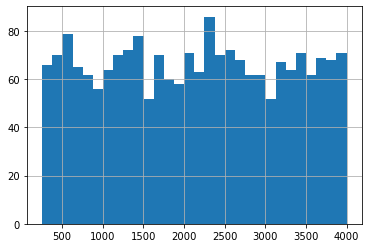

In [48]:
mobile_train["ram"].hist(bins=30);

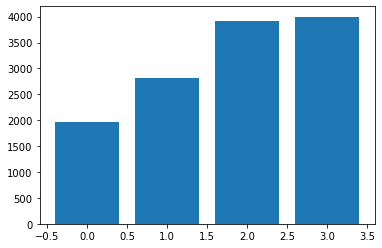

In [101]:
plt.bar(mobile_train["price_range"], mobile_train["ram"]);

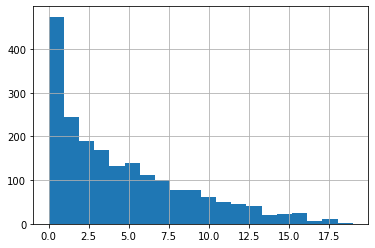

In [50]:
mobile_train["fc"].hist(bins=20);

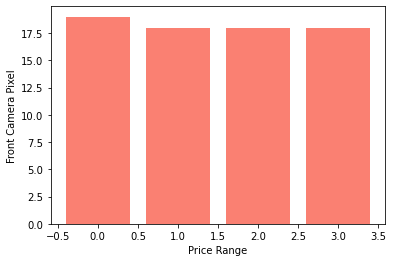

In [53]:
plt.bar(mobile_train["price_range"], mobile_train["fc"], color=["salmon"])
plt.xlabel("Price Range")
plt.ylabel("Front Camera Pixel");